In [0]:
# https://www.youtube.com/watch?v=5u4G23_OohI

In [0]:
import pandas as pd

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
data_original = pd.read_csv('/content/drive/My Drive/Deep Learning/DL_HW1/ex1data2.txt', header = None)
data_original

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [0]:
import torch

In [0]:
data = torch.from_numpy(data_original.values).float()

In [196]:
data[0:5]

tensor([[2.1040e+03, 3.0000e+00, 3.9990e+05],
        [1.6000e+03, 3.0000e+00, 3.2990e+05],
        [2.4000e+03, 3.0000e+00, 3.6900e+05],
        [1.4160e+03, 2.0000e+00, 2.3200e+05],
        [3.0000e+03, 4.0000e+00, 5.3990e+05]])

In [0]:
X = data[:,0:2]

In [0]:
y = data[:, 2]

In [200]:
X.shape

torch.Size([47, 2])

In [0]:
X = X.t()

In [202]:
X.shape, y.shape

(torch.Size([2, 47]), torch.Size([47]))

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

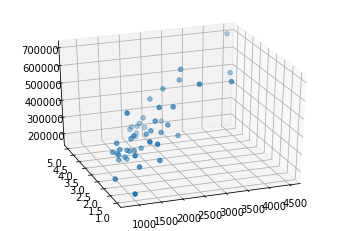

In [204]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 250)
ax.scatter(X[0, :], X[1, :], y[:])
plt.show()

In [0]:
def featureNormalize(X):
  mu = torch.mean(X, dim = 1).unsqueeze(1)  
  std = torch.std(X, dim = 1).unsqueeze(1)
  X_norm = (X - mu)/std
  
  return X_norm, mu, std

In [0]:
X_norm, mu, std = featureNormalize(X)

In [207]:
mu, std

(tensor([[2000.6809],
         [   3.1702]]), tensor([[7.9470e+02],
         [7.6098e-01]]))

In [208]:
w = torch.zeros(X.shape[0], 1)
b=0
w.shape

torch.Size([2, 1])

In [0]:
def computeCost(X, y, w, b):
  J = 0
  m=len(y)
  y_hat = torch.matmul(w.t(), X) + b
  J = 1/(2*m) * ((y_hat - y)**2).sum()

  return J
  

In [211]:
cost = computeCost(X_norm,y,w,b); cost

tensor(6.5592e+10)

In [0]:
epochs = 400
alpha = 0.01

In [214]:
X_norm.shape

torch.Size([2, 47])

In [0]:
def gradientDescent(X, y, w, b, alpha, epochs):
  m = len(y)
  J_history = []
  
  for i in range(epochs):
    y_hat = torch.matmul(w.t(), X) + b 
    b = b - (alpha * 1/m * (y_hat - y)).sum()
    for j in range(len(w)):
      w[j] = w[j] - (alpha * 1/m * ((y_hat-y) * X[j])).sum()
    
    J_history.append(computeCost(X, y, w, b))
 
  return w, b, J_history

In [0]:
w, b, J_h = gradientDescent(X_norm, y, w, b, alpha, epochs)

In [219]:
print(w,b)

tensor([[100087.1250],
        [  3673.5552]]) tensor(334302.1250)


In [220]:
b, w

(tensor(334302.1250), tensor([[100087.1250],
         [  3673.5552]]))

In [221]:
J_h[399]

tensor(2.1088e+09)

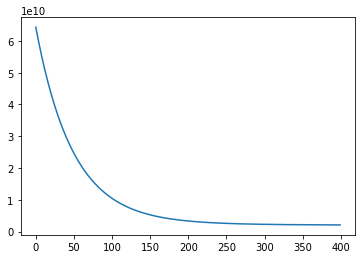

In [222]:
plt.plot(J_h)

In [0]:
import numpy as np

In [0]:
xx = np.linspace(X_norm[0,:].min(), X_norm[0,:].max())
yy = np.linspace(X_norm[1,:].min(), X_norm[1,:].max())

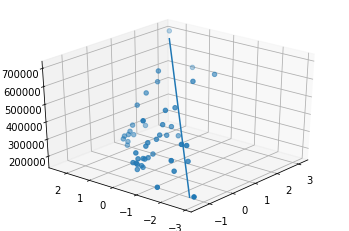

In [225]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 220)
ax.scatter(X_norm[0,:], X_norm[1,:], y)
ax.plot(xx, yy, xx*w[0,0].numpy() + yy*w[1,0].numpy() + b.numpy() )
plt.show()

In [0]:
def Predict(area, rooms):
  d = torch.tensor([[area], [rooms]], dtype = torch.float32)
  d = (d-mu)/std
  price = w.T@d + b
  return price.item()

In [227]:
Predict(2500,4)

401193.53125